**Importing the necessary libraries and modules**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score


**# Data extraction and statistical aspects**
* In this step, the Iris dataset is loaded using the **load_iris()** function from **sklearn.datasets**. 
* The features (X) and target labels (y) are extracted from the dataset. 
* The statistical aspects of the data, such as count, mean, standard deviation, minimum, quartiles, and maximum values, are computed using '**df.describe()**'.


In [19]:
# Load the Iris dataset
iris = load_iris()

# Extract features (X) and target labels (y)
X = iris.data
y = iris.target

# Consider only virginica and non-virginica labels
X = X[y != 0, :]  # Exclude setosa samples
y = y[y != 0]

# Convert the labels to binary values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create a pandas DataFrame for data analysis and visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Data extraction
data_description = df.describe()
print("Data Description:")
print(data_description)


Data Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)   
count         100.000000        100.000000         100.000000  \
mean            6.262000          2.872000           4.906000   
std             0.662834          0.332751           0.825578   
min             4.900000          2.000000           3.000000   
25%             5.800000          2.700000           4.375000   
50%             6.300000          2.900000           4.900000   
75%             6.700000          3.025000           5.525000   
max             7.900000          3.800000           6.900000   

       petal width (cm)      target  
count        100.000000  100.000000  
mean           1.676000    0.500000  
std            0.424769    0.502519  
min            1.000000    0.000000  
25%            1.300000    0.000000  
50%            1.600000    0.500000  
75%            2.000000    1.000000  
max            2.500000    1.000000  


**Type of each column**
* This step determines the data type of each column in the DataFrame using **df.dtypes**. 
* It provides information about the data types of the features, helping to identify whether they are numeric or categorical.

In [20]:
data_types = df.dtypes
print("Data Types:")
print(data_types)


Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


**Description of Iris Plants Database**

In [21]:
print("Description:")
print(iris.DESCR)


Description:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ====

**Data Visualization**

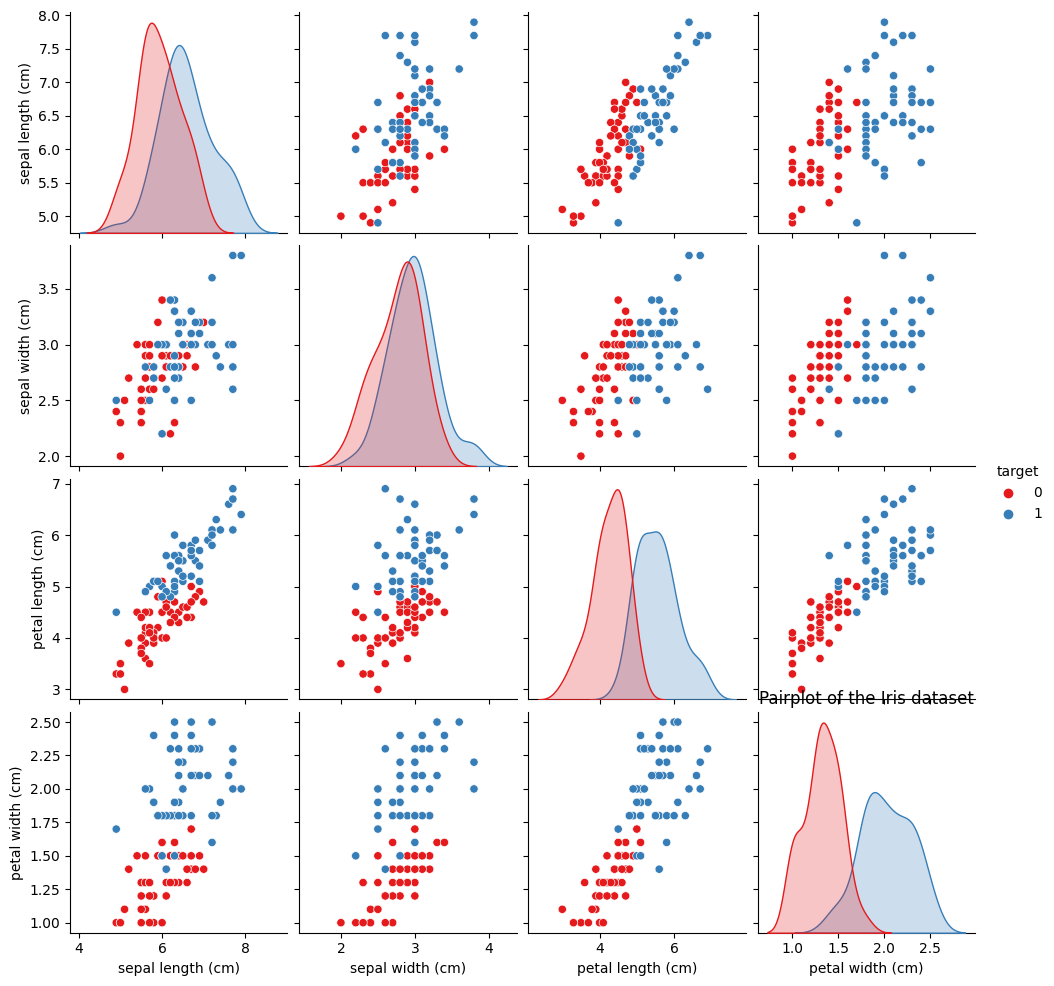

In [22]:
# Pairplot
sns.pairplot(df, hue='target', palette='Set1')
plt.title("Pairplot of the Iris dataset")
plt.show()


**# Data modeling**
* Here, the dataset is split into training and testing sets using '**train_test_split()**' from '**sklearn.model_selection**'. 
* Then, a logistic regression model is created using '**LogisticRegression()**' from '**sklearn.linear_model**'. 

In [23]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression()

**# Model evaluation**
*  After training the logistic regression model on the training set, predictions are made on the test set using "**predict()**".
* The performance of the model is evaluated using various metrics, including accuracy, precision, recall, and the confusion matrix.
* Accuracy: The ratio of correctly classified samples to the total number of samples in the test set.
* Precision: The ability of the model to correctly identify positive samples.
* Recall: The ability of the model to correctly identify all positive samples.
* Confusion Matrix: A table showing the number of true positives, false positives, true negatives, and false negatives.

In [24]:
# Predict on the test set
y_pred = logreg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion_mat)


Model Evaluation:
Accuracy: 0.95
Precision: 0.8888888888888888
Recall: 1.0
Confusion Matrix:
[[11  1]
 [ 0  8]]


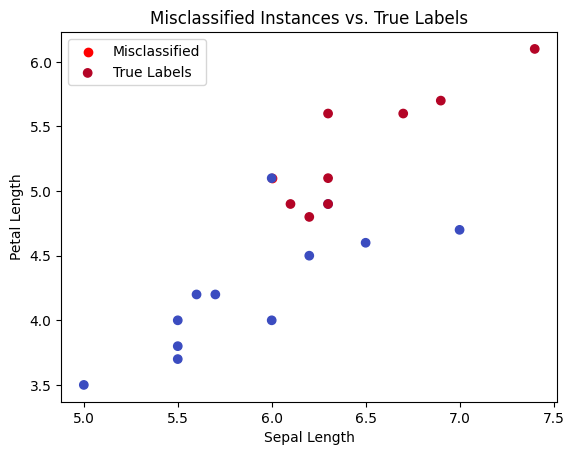

In [25]:
# Analyze misclassified instances
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_instances = X_test[misclassified_indices]

# mean feature values of misclassified instances
mean_feature_values = np.mean(misclassified_instances, axis=0)

# Visualize the misclassified instances with respect to two features (e.g., sepal length and petal length)
misclassified_feature1 = misclassified_instances[:, 0]
misclassified_feature2 = misclassified_instances[:, 2]

plt.scatter(misclassified_feature1, misclassified_feature2, c='r', label='Misclassified')
plt.scatter(X_test[:, 0], X_test[:, 2], c=y_test, cmap='coolwarm', label='True Labels')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Misclassified Instances vs. True Labels')
plt.legend()
plt.show()
